# Hydropower Plant

## As usual.. First some Imports

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## Defninition of Problem Inputs
We define the problem inputs, that is the time horizon ($T$), the capacity of the power grid ($C$), the capacity of the reservoir ($V$) as well as the price ($p$) and influx of energy ($i$).

In [2]:
T = 52; # Time duration
C = 5; # Power-Grid Capacity
V = 10; # Reservoir Capacity
t = np.expand_dims(np.arange(1, T+1),1)

In [3]:
i = 4-4*np.cos(2*np.pi*t/52)
p = 1+np.sin(24*np.pi*t/52)

## Problem Definition and Solution
Define the problem (decision variables, constraints and objective) and solve it.<br>
*Hint: You have defined your problem on paper in question (a), now bring it to code.*

In [5]:
x = cp.Variable((T+1, 1)) # energy stored
s = cp.Variable((T, 1)) # energy released
u = cp.Variable((T, 1)) # engery sold

In [6]:
constraints = [
    x[0,0] == 0.2*V,
    x[T,0] >= 0.8*V,
    u<=C,
    x<=V,
    s>=0,
    x>=0,
    u>=0,
    x[1:]==x[:-1]+i-u-s
]

In [7]:
objective = cp.Minimize(-p.T@u)

In [8]:
problem = cp.Problem(objective, constraints)

In [9]:
problem.solve()

-190.1189487047713

Since we minimized **-** the objective, the maximum is $190.1$ 

## Plot The Optimal Plan
Plot the optimal plan to manage the hydropower plant. We provide the function `plot_plan(stored, sold, spilled, price, influx)` that will do this for you. Use it to plot your plan.

In [10]:
def plot_plan(stored, sold, spilled, price, influx):
    fig, axs = plt.subplots(5,1, figsize=(12,12), sharex=True)
    axs[0].plot(stored)
    axs[0].set_title('Energy Stored')

    axs[1].plot(sold)
    axs[1].set_title('Energy Sold')

    axs[2].plot(spilled)
    axs[2].set_title('Energy Spilled')

    axs[3].plot(price)
    axs[3].set_title('Price')

    axs[4].plot(influx)
    axs[4].set_title('Energy Influx')
    axs[4].set_xlabel('Time')
    
    axs[0].set_ylabel('Amount')
    axs[1].set_ylabel('Amount')
    axs[2].set_ylabel('Amount')
    axs[3].set_ylabel('$/Amount')
    axs[4].set_ylabel('Amount')

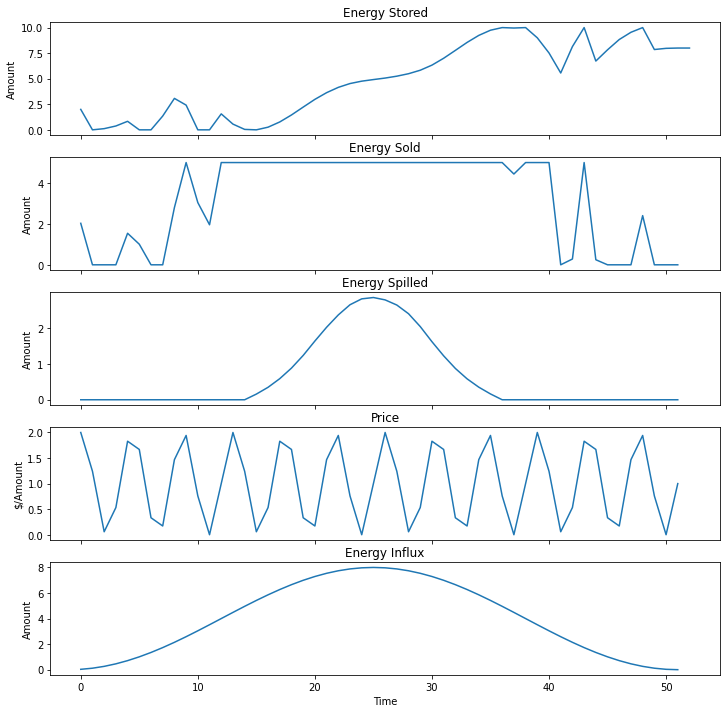

In [11]:
plot_plan(x.value, u.value, s.value, p, i)